## 연속형 변수 다 사용

In [44]:
import pandas as pd
berry_0 = pd.read_csv("C:/Users/user/Desktop/빅콘테스트/STRAWBERRY_FRUIT_SETTING_ENV_20221209.csv")
print (berry_0.head())
# 원본 파일 불러오기

   ZONE_NM          STRG_DT  FRST_TREE_CNT  RTTN_PUMP_OPRT_YN_4  \
0       66  2022/01/01 0:00            5.0                    0   
1       66  2022/01/01 0:10            5.0                    0   
2       66  2022/01/01 0:20            5.0                    0   
3       66  2022/01/01 0:30            5.0                    0   
4       66  2022/01/01 0:40            5.0                    0   

   RTTN_PUMP_OPRT_YN_3  RTTN_PUMP_OPRT_YN_2  RTTN_PUMP_OPRT_YN_1  \
0                    0                    1                    1   
1                    0                    1                    1   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   CLR_OPRT_YN_5  CLR_OPRT_YN_4  CLR_OPRT_YN_3  ...  SKLT_OPDR_RATE_1_LEFT  \
0              0              0              0  ...                      0   
1              0              0 

In [45]:
# 상관관계 보고 추린 필요한 변수들만 가져오기
berry_1= berry_0[["PFBS_NTRO_CBDX_CTRN","EXTN_TPRT","DWP_TPRT","WNDRC","ABSLT_HMDT","WDSP"
,"STRTN_WATER","EXTN_SRQT","WATER_LACK_VL","EXTN_ACCMLT_QOFLG","SPL_TPRT_1","HTNG_TPRT_1","VNTILAT_TPRT_5"
,"VNTILAT_TPRT_4","VNTILAT_TPRT_3","TRWVLV_OPDR_RATE_2","TRWVLV_OPDR_RATE_1","HRZNT_SCRN_OPDR_RATE_2"
,"HRZNT_SCRN_OPDR_RATE_1","VNTILAT_TPRT_1","SPL_TPRT_2","INNER_TPRT_1","INNER_TPRT_2","AVE_INNER_TPRT_1_2","INNER_HMDT_1",
"INNER_HMDT_2","AVE_INNER_HMDT_1_2","CBDX_STNG_VL","SKLT_OPDR_RATE_1_RIGHT","SKLT_OPDR_RATE_1_LEFT",'FRST_TREE_CNT']]
print (berry_1.head())

   PFBS_NTRO_CBDX_CTRN  EXTN_TPRT  DWP_TPRT  WNDRC  ABSLT_HMDT  WDSP  \
0                  456       -2.2       8.5    193         8.3   2.6   
1                  459       -2.2       9.0    205         8.6   3.0   
2                  468       -2.2       9.1    198         8.6   3.0   
3                  466       -2.3       9.2    213         8.7   2.6   
4                  467       -2.3       9.2    193         8.7   3.3   

   STRTN_WATER  EXTN_SRQT  WATER_LACK_VL  EXTN_ACCMLT_QOFLG  ...  \
0          9.2          0            0.9                962  ...   
1          9.4          0            0.8                962  ...   
2          9.5          0            0.9                962  ...   
3          9.4          0            0.7                962  ...   
4          9.3          0            0.6                962  ...   

   INNER_TPRT_1  INNER_TPRT_2  AVE_INNER_TPRT_1_2  INNER_HMDT_1  INNER_HMDT_2  \
0          10.0           7.8                 8.9          90.4          93.5

In [46]:
x= berry_1.drop("FRST_TREE_CNT",axis=1).values
y= berry_1["FRST_TREE_CNT"].values
print(x)
print(y)

[[456.   -2.2   8.5 ... 550.    0.    0. ]
 [459.   -2.2   9.  ... 550.    0.    0. ]
 [468.   -2.2   9.1 ... 550.    0.    0. ]
 ...
 [423.   24.9  24.1 ...   0.   40.    0. ]
 [427.   24.6  24.  ...   0.   40.    0. ]
 [431.   25.   24.1 ...   0.   40.    0. ]]
[5.  5.  5.  ... 0.5 0.5 0.5]


In [47]:
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt

names =berry_1.drop("FRST_TREE_CNT",axis=1).columns

print(names)

Index(['PFBS_NTRO_CBDX_CTRN', 'EXTN_TPRT', 'DWP_TPRT', 'WNDRC', 'ABSLT_HMDT',
       'WDSP', 'STRTN_WATER', 'EXTN_SRQT', 'WATER_LACK_VL',
       'EXTN_ACCMLT_QOFLG', 'SPL_TPRT_1', 'HTNG_TPRT_1', 'VNTILAT_TPRT_5',
       'VNTILAT_TPRT_4', 'VNTILAT_TPRT_3', 'TRWVLV_OPDR_RATE_2',
       'TRWVLV_OPDR_RATE_1', 'HRZNT_SCRN_OPDR_RATE_2',
       'HRZNT_SCRN_OPDR_RATE_1', 'VNTILAT_TPRT_1', 'SPL_TPRT_2',
       'INNER_TPRT_1', 'INNER_TPRT_2', 'AVE_INNER_TPRT_1_2', 'INNER_HMDT_1',
       'INNER_HMDT_2', 'AVE_INNER_HMDT_1_2', 'CBDX_STNG_VL',
       'SKLT_OPDR_RATE_1_RIGHT', 'SKLT_OPDR_RATE_1_LEFT'],
      dtype='object')


In [48]:
split_index = int(len(berry_1) * 0.8)
x_train = x[:split_index]
y_train = y[:split_index]
x_test = x[split_index:]
y_test = y[split_index:]

In [49]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
#x_scaled = pd.DataFrame(x_scaled)
print(x_train_scaled)

[[-0.04396456 -1.32057274 -1.1418214  ... -2.75638179 -0.67278197
  -0.66299414]
 [-0.01066735 -1.32057274 -1.06182995 ... -2.75638179 -0.67278197
  -0.66299414]
 [ 0.08922428 -1.32057274 -1.04583166 ... -2.75638179 -0.67278197
  -0.66299414]
 ...
 [-0.66551249  1.8458331   0.15404014 ...  0.47765097  0.23288147
   0.93932271]
 [-0.65441342  1.83448397  0.15404014 ...  0.47765097  0.23288147
   0.93932271]
 [-0.6988097   1.8004366   0.15404014 ...  0.47765097  0.23288147
   0.93932271]]


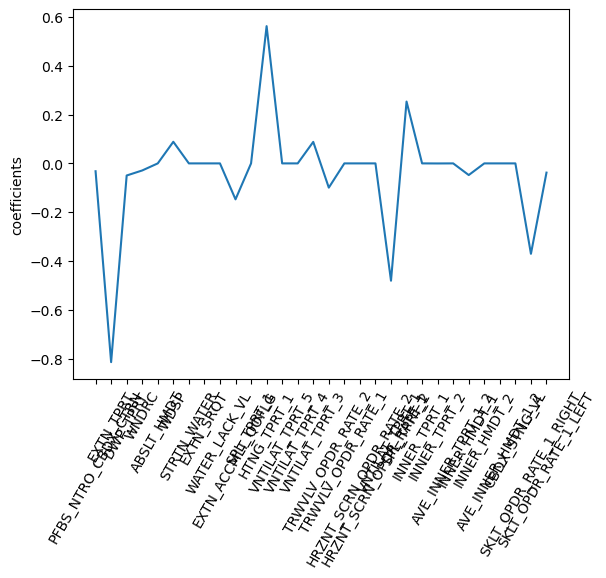

In [50]:
lasso= Lasso(alpha=0.1)
lasso_coef=lasso.fit(x_train_scaled,y_train).coef_

_=plt.plot(range(len(names)),lasso_coef)

_=plt.xticks(range(len(names)),names,rotation=60)

_=plt.ylabel("coefficients")

plt.show()

In [51]:
from sklearn.metrics import mean_squared_error
# 테스트 세트에 대한 예측
y_pred = lasso.predict(x_test_scaled)

# 평균 제곱 오차 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.709139263123542


In [52]:
import numpy as np
# Lasso 모델의 계수와 변수명 가져오기
coefficients = lasso.coef_


# 계수 크기의 절댓값에 따라 정렬한 인덱스 가져오기
sorted_idx = np.argsort(np.abs(coefficients))[::-1]

# 정렬된 계수와 변수명 출력
for i in sorted_idx:
    coef = coefficients[i]
    col_name = names[i]
    print(f"변수명: {col_name}, 계수: {coef}")

변수명: EXTN_TPRT, 계수: -0.8146680891433641
변수명: HTNG_TPRT_1, 계수: 0.5626038681327377
변수명: VNTILAT_TPRT_1, 계수: -0.4809246384162381
변수명: SKLT_OPDR_RATE_1_RIGHT, 계수: -0.37069699842793247
변수명: SPL_TPRT_2, 계수: 0.25339318790301607
변수명: EXTN_ACCMLT_QOFLG, 계수: -0.14736858768038585
변수명: TRWVLV_OPDR_RATE_2, 계수: -0.09937644441044532
변수명: WDSP, 계수: 0.08856399962985474
변수명: VNTILAT_TPRT_3, 계수: 0.08815740129564323
변수명: DWP_TPRT, 계수: -0.049647057453514665
변수명: INNER_HMDT_1, 계수: -0.047773222081312246
변수명: SKLT_OPDR_RATE_1_LEFT, 계수: -0.037828248525005145
변수명: PFBS_NTRO_CBDX_CTRN, 계수: -0.032167438818732685
변수명: WNDRC, 계수: -0.028989130141117463
변수명: INNER_TPRT_2, 계수: -0.00026029744277695604
변수명: EXTN_SRQT, 계수: 0.0
변수명: CBDX_STNG_VL, 계수: -0.0
변수명: AVE_INNER_HMDT_1_2, 계수: -0.0
변수명: ABSLT_HMDT, 계수: -0.0
변수명: INNER_HMDT_2, 계수: -0.0
변수명: STRTN_WATER, 계수: -0.0
변수명: HRZNT_SCRN_OPDR_RATE_2, 계수: 0.0
변수명: TRWVLV_OPDR_RATE_1, 계수: 0.0
변수명: AVE_INNER_TPRT_1_2, 계수: -0.0
변수명: SPL_TPRT_1, 계수: -0.0
변수명: VNTILAT_TPRT_5, 계수: 0

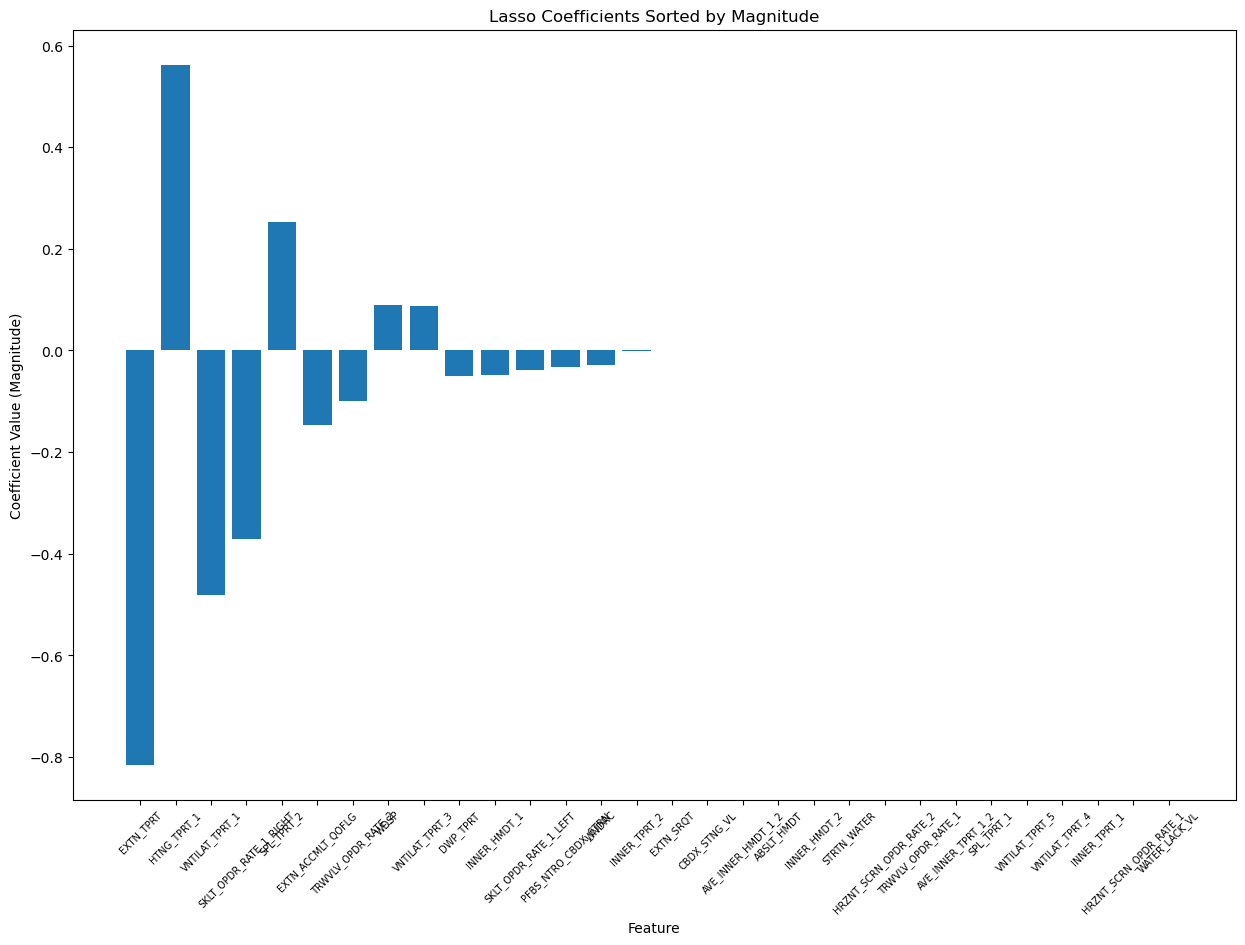

In [53]:
# 정렬된 계수와 변수명 가져오기
sorted_coefficients = coefficients[sorted_idx]
sorted_columns = names[sorted_idx]

# 시각화
plt.figure(figsize=(15, 10))
plt.bar(sorted_columns, sorted_coefficients)
plt.title('Lasso Coefficients Sorted by Magnitude')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value (Magnitude)')
plt.xticks(rotation=45, fontsize=7)
plt.show()

## 연속형 변수 일부만 사용

In [54]:
# 상관관계 보고 추린 필요한 변수들만 가져오기
berry_2= berry_0[["PFBS_NTRO_CBDX_CTRN","EXTN_TPRT","DWP_TPRT","ABSLT_HMDT","STRTN_WATER","WATER_LACK_VL","SPL_TPRT_1","HTNG_TPRT_1","CBDX_GNRT_OPRT_YN","SPL_TPRT_2","AVE_INNER_TPRT_1_2","AVE_INNER_HMDT_1_2","SKLT_OPDR_RATE_1_RIGHT","SKLT_OPDR_RATE_1_LEFT",'FRST_TREE_CNT']]
print (berry_2.head())

   PFBS_NTRO_CBDX_CTRN  EXTN_TPRT  DWP_TPRT  ABSLT_HMDT  STRTN_WATER  \
0                  456       -2.2       8.5         8.3          9.2   
1                  459       -2.2       9.0         8.6          9.4   
2                  468       -2.2       9.1         8.6          9.5   
3                  466       -2.3       9.2         8.7          9.4   
4                  467       -2.3       9.2         8.7          9.3   

   WATER_LACK_VL  SPL_TPRT_1  HTNG_TPRT_1  CBDX_GNRT_OPRT_YN  SPL_TPRT_2  \
0            0.9        30.6          9.0                  0        10.0   
1            0.8        37.2          9.0                  0        10.3   
2            0.9        34.8          9.0                  0        10.5   
3            0.7        33.6          9.0                  0        10.4   
4            0.6        33.4          9.0                  0        10.1   

   AVE_INNER_TPRT_1_2  AVE_INNER_HMDT_1_2  SKLT_OPDR_RATE_1_RIGHT  \
0                 8.9                92.0

In [55]:
x_1= berry_2.drop("FRST_TREE_CNT",axis=1).values
y= berry_2["FRST_TREE_CNT"].values
print(x_1)
print(y)

[[456.   -2.2   8.5 ...  92.    0.    0. ]
 [459.   -2.2   9.  ...  92.    0.    0. ]
 [468.   -2.2   9.1 ...  90.2   0.    0. ]
 ...
 [423.   24.9  24.1 ...  91.8  40.    0. ]
 [427.   24.6  24.  ...  92.2  40.    0. ]
 [431.   25.   24.1 ...  92.9  40.    0. ]]
[5.  5.  5.  ... 0.5 0.5 0.5]


In [56]:
names_1 =berry_2.drop("FRST_TREE_CNT",axis=1).columns

print(names_1)

Index(['PFBS_NTRO_CBDX_CTRN', 'EXTN_TPRT', 'DWP_TPRT', 'ABSLT_HMDT',
       'STRTN_WATER', 'WATER_LACK_VL', 'SPL_TPRT_1', 'HTNG_TPRT_1',
       'CBDX_GNRT_OPRT_YN', 'SPL_TPRT_2', 'AVE_INNER_TPRT_1_2',
       'AVE_INNER_HMDT_1_2', 'SKLT_OPDR_RATE_1_RIGHT',
       'SKLT_OPDR_RATE_1_LEFT'],
      dtype='object')


In [57]:
split_index = int(len(berry_2) * 0.8)
x_train_1 = x_1[:split_index]
x_test_1 = x_1[split_index:]

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled_1 = scaler.fit_transform(x_train_1)
x_test_scaled_1=scaler.transform(x_test_1)
print(x_train_scaled_1)

[[0.0653753  0.15238095 0.10833333 ... 0.88304094 0.         0.        ]
 [0.06719128 0.15238095 0.11875    ... 0.88304094 0.         0.        ]
 [0.07263923 0.15238095 0.12083333 ... 0.85672515 0.         0.        ]
 ...
 [0.031477   0.81666667 0.27708333 ... 0.34795322 0.2        0.4       ]
 [0.03208232 0.81428571 0.27708333 ... 0.35087719 0.2        0.4       ]
 [0.02966102 0.80714286 0.27708333 ... 0.36842105 0.2        0.4       ]]


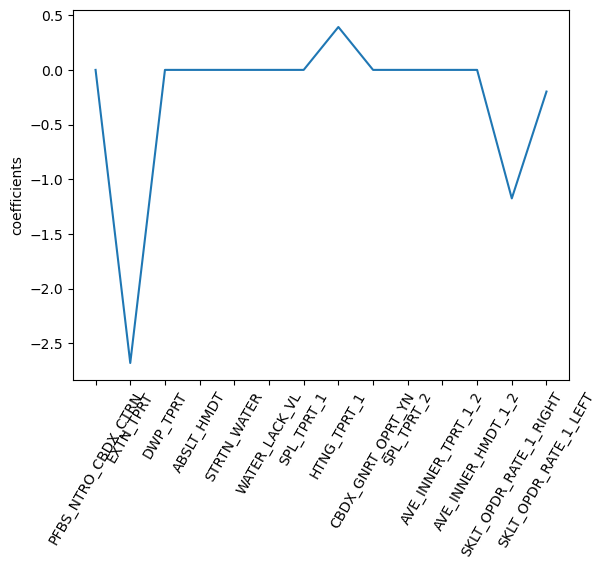

In [59]:
lasso_part= Lasso(alpha=0.1)
lasso_part_coef=lasso_part.fit(x_train_scaled_1,y_train).coef_

_=plt.plot(range(len(names_1)),lasso_part_coef)

_=plt.xticks(range(len(names_1)),names_1,rotation=60)

_=plt.ylabel("coefficients")

plt.show()

In [60]:
# 테스트 세트에 대한 예측
y_part_pred = lasso_part.predict(x_test_scaled_1)

# 평균 제곱 오차 계산
mse_1 = mean_squared_error(y_test, y_part_pred)
print("Mean Squared Error:", mse_1)

Mean Squared Error: 10.939779279297106


In [61]:
# Lasso 모델의 계수와 변수명 가져오기
coefficients_1 = lasso_part.coef_


# 계수 크기의 절댓값에 따라 정렬한 인덱스 가져오기
sorted_idx_1 = np.argsort(np.abs(coefficients_1))[::-1]

# 정렬된 계수와 변수명 출력
for i in sorted_idx_1:
    coef = coefficients_1[i]
    col_name = names_1[i]
    print(f"변수명: {col_name}, 계수: {coef}")

변수명: EXTN_TPRT, 계수: -2.6808982934149492
변수명: SKLT_OPDR_RATE_1_RIGHT, 계수: -1.1754288715841412
변수명: HTNG_TPRT_1, 계수: 0.3924092630285732
변수명: SKLT_OPDR_RATE_1_LEFT, 계수: -0.19816428933064906
변수명: AVE_INNER_HMDT_1_2, 계수: -0.0
변수명: AVE_INNER_TPRT_1_2, 계수: -0.0
변수명: SPL_TPRT_2, 계수: 0.0
변수명: CBDX_GNRT_OPRT_YN, 계수: 0.0
변수명: SPL_TPRT_1, 계수: -0.0
변수명: WATER_LACK_VL, 계수: -0.0
변수명: STRTN_WATER, 계수: -0.0
변수명: ABSLT_HMDT, 계수: -0.0
변수명: DWP_TPRT, 계수: -0.0
변수명: PFBS_NTRO_CBDX_CTRN, 계수: 0.0


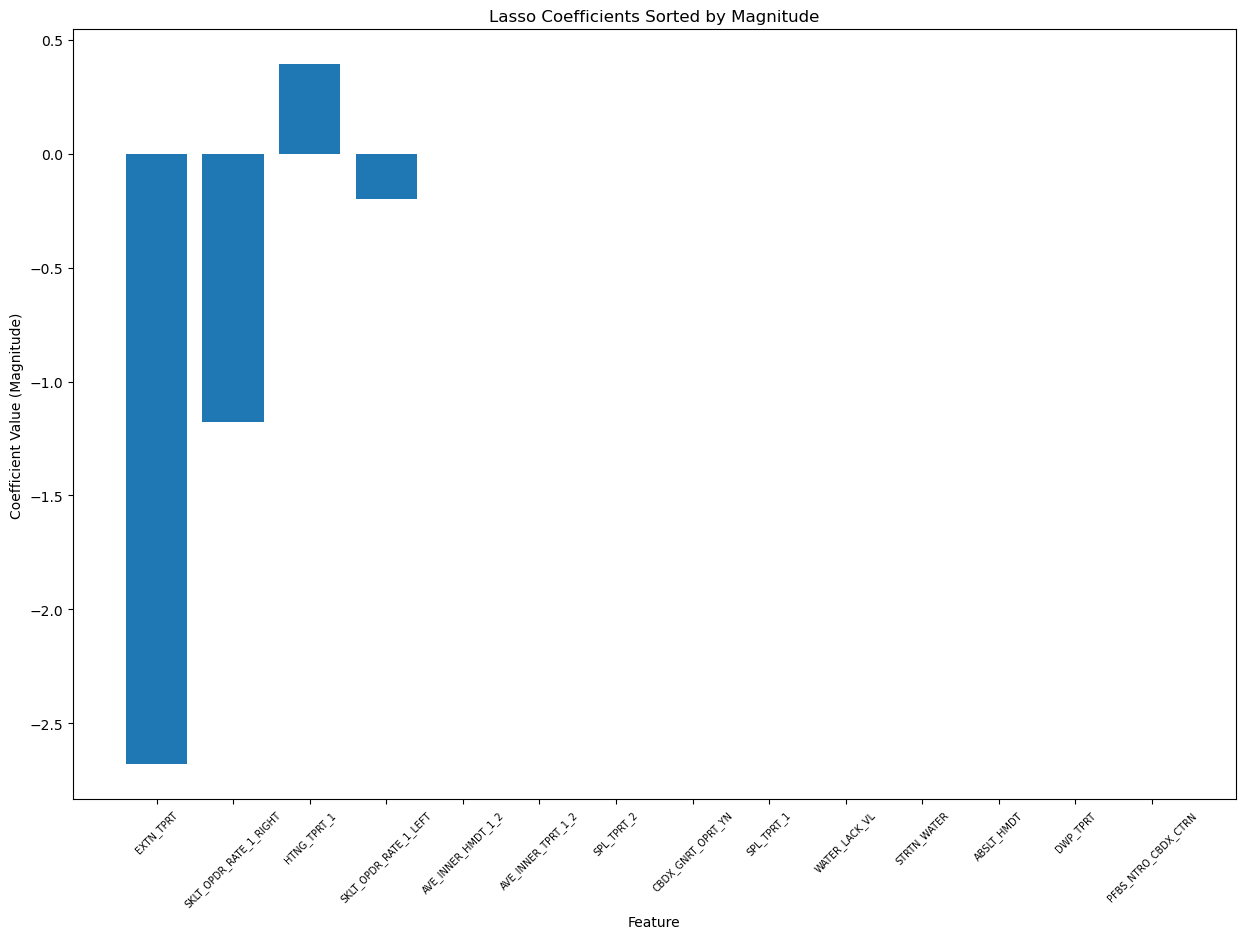

In [62]:
# 정렬된 계수와 변수명 가져오기
sorted_coefficients_1 = coefficients_1[sorted_idx_1]
sorted_columns_1 = names_1[sorted_idx_1]

# 시각화
plt.figure(figsize=(15, 10))
plt.bar(sorted_columns_1, sorted_coefficients_1)
plt.title('Lasso Coefficients Sorted by Magnitude')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value (Magnitude)')
plt.xticks(rotation=45, fontsize=7)
plt.show()

# 결론적으로 중요하다고 나온 변수 : 
1. 온실 외부온도 
2. 일광과 환시를 조절하는데 사용되는 천창의 열림정도
3. 온실 내에서 측정된 난방 온도
4. 일광과 환시를 조절하는데 사용되는 천창의 열림정도


참고: https://for-my-wealthy-life.tistory.com/18
    & 유튜브 링크(이따 달기)

# 랜덤 포레스트

## 연속형 변수 다 

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [ ]:
# 랜덤 포레스트 모델을 초기화
rf_model = RandomForestRegressor()

# 모델을 사용해 피쳐를 선택
sfm = SelectFromModel(estimator=rf_model, threshold="median")
X_train_transformed = sfm.fit_transform(x_train, y_train)
X_test_transformed = sfm.transform(x_test)  # test set을 변환

In [ ]:
# 모델을 선택된 피쳐를 사용하여 학습
rf_model.fit(X_train_transformed, y_train)

# 테스트 세트에서 모델 평가
y_pred = rf_model.predict(X_test_transformed)

# 회귀 모델의 성능 평가 (MSE 사용)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
importances = rf_model.feature_importances_
idxs = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [names[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')
plt.show()

In [ ]:
# 계수 크기의 절댓값에 따라 정렬한 인덱스 가져오기
sorted_idx = np.argsort(np.abs(importances))[::-1]

# 정렬된 계수와 변수명 출력
for i in sorted_idx:
    coef = importances[i]
    col_name = names[i]
    print(f"변수명: {col_name}, 계수: {coef}")

In [ ]:
# 정렬된 계수와 변수명 가져오기
sorted_coefficients = importances[sorted_idx]
sorted_columns = names[sorted_idx]

# 시각화
plt.figure(figsize=(15, 10))
plt.bar(sorted_columns, sorted_coefficients)
plt.title('Lasso Coefficients Sorted by Magnitude')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value (Magnitude)')
plt.xticks(rotation=45, fontsize=7)
plt.show()

## 연속형 변수 일부

In [ ]:
# 랜덤 포레스트 모델을 초기화
rf_part_model = RandomForestRegressor()

# 모델을 사용해 피쳐를 선택
sfm = SelectFromModel(estimator=rf_part_model, threshold="median")
X_train_1_transformed = sfm.fit_transform(x_train_1, y_train)
X_test_1_transformed = sfm.transform(x_test_1)  # test set을 변환

In [ ]:
# 모델을 선택된 피쳐를 사용하여 학습
rf_part_model.fit(X_train_1_transformed, y_train)

# 테스트 세트에서 모델 평가
y_pred = rf_part_model.predict(X_test_1_transformed)

# 회귀 모델의 성능 평가 (MSE 사용)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
importances = rf_part_model.feature_importances_
idxs = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [names_1[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')
plt.show()

In [ ]:
# 계수 크기의 절댓값에 따라 정렬한 인덱스 가져오기
sorted_idx = np.argsort(np.abs(importances))[::-1]

# 정렬된 계수와 변수명 출력
for i in sorted_idx:
    coef = importances[i]
    col_name = names_1[i]
    print(f"변수명: {col_name}, 계수: {coef}")

In [ ]:
# 정렬된 계수와 변수명 가져오기
sorted_coefficients = importances[sorted_idx]
sorted_columns = names_1[sorted_idx]

# 시각화
plt.figure(figsize=(15, 10))
plt.bar(sorted_columns, sorted_coefficients)
plt.title('Lasso Coefficients Sorted by Magnitude')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value (Magnitude)')
plt.xticks(rotation=45, fontsize=7)
plt.show()